<a href="https://colab.research.google.com/github/hhugoac/GoogleColabNotebooks/blob/main/Practica21_256169.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Ejercicio 1: Normalización Min-Max

1. Cargar el dataset wine de sklearn.
2. Seleccionar una de las características numéricas (por ejemplo, alcohol).
3. Realizar una prueba de normalidad (usando scipy.stats.shapiro) sobre los datos originales.
4. Aplicar la normalización Min-Max a los datos seleccionados.
5. Realizar la prueba de normalidad nuevamente sobre los datos normalizados.
6. Graficar los datos originales y los normalizados utilizando matplotlib o seaborn.

7. Responder las preguntas siguientes.

  * ¿Cómo afectó la normalización Min-Max a la distribución de los datos?
  * ¿Qué interpretas del p-valor antes y después de la normalización?

In [4]:
# Setup the libraries and loading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

In [9]:
# 1. Loading dataset
data_wine = load_wine()

data_wine.keys()

print(data_wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [12]:
# 2. Select the alcohol category
data_frame = pd.DataFrame(data_wine.data, columns=data_wine.feature_names)
#data_frame['label'] = data_wine.target
data_frame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [17]:
# 3. doing the test on the alcohol column using from scipy.stats import shapiro
from scipy.stats import shapiro

alcohol_data = data_frame['alcohol']
shapiro_stat, p_value = shapiro(alcohol_data)

# Print results
print(f"Shapiro-Wilk Test for 'alcohol' column:")
print(f"Test Statistic: {shapiro_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("Result: Normally distributed (fail to reject H0)")
else:
    print("Result: Not normally distributed (reject H0)")

Shapiro-Wilk Test for 'alcohol' column:
Test Statistic: 0.9818
P-value: 0.0200
Result: Not normally distributed (reject H0)


In [16]:
# 4. Applying min-max normalization
from sklearn.preprocessing import MinMaxScaler

# Reshape alcohol to 2D array (required by scikit-learn)
alcohol_2d = alcohol_data.values.reshape(-1, 1)
# Apply Min-Max Scaling
scaler = MinMaxScaler()
alcohol_normalized_sklearn = scaler.fit_transform(alcohol_2d).flatten()

Normalized (Scikit-Learn) first 5: [0.84210526 0.57105263 0.56052632 0.87894737 0.58157895]


In [18]:
# 5. re-doing the test on the min-max normalizad alcohol column
#    using from scipy.stats import shapiro

shapiro_stat_minmax_normalization, p_value_minmax_normalization = shapiro(alcohol_normalized_sklearn)

# Print results
print(f"Shapiro-Wilk Test for 'alcohol' column:")
print(f"Test Statistic: {shapiro_stat_minmax_normalization:.4f}")
print(f"P-value: {p_value_minmax_normalization:.4f}")

if p_value_minmax_normalization > 0.05:
    print("Result: Normally distributed (fail to reject H0)")
else:
    print("Result: Not normally distributed (reject H0)")

Shapiro-Wilk Test for 'alcohol' column:
Test Statistic: 0.9818
P-value: 0.0200
Result: Not normally distributed (reject H0)


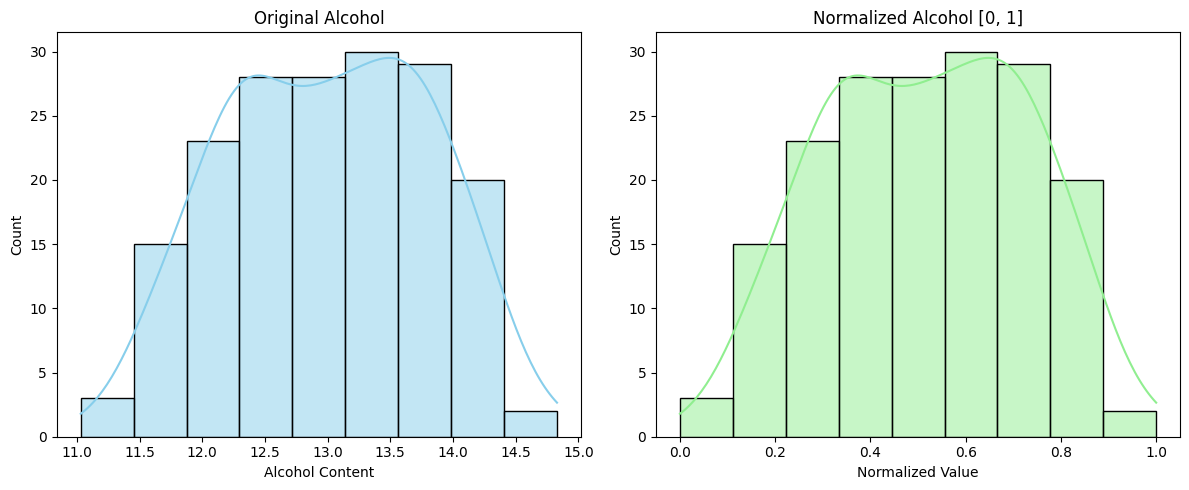

In [19]:
#6. ploting both original and normalized data

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot original data
sns.histplot(alcohol_data, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Original Alcohol")
axes[0].set_xlabel("Alcohol Content")

# Plot normalized data
sns.histplot(alcohol_normalized_sklearn, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title("Normalized Alcohol [0, 1]")
axes[1].set_xlabel("Normalized Value")

plt.tight_layout()
plt.show()

7. Responder las preguntas siguientes

¿Cómo afectó la normalización Min-Max a la distribución de los datos?
La normalización no afecta la distribución de los datos ya que solo los reajusta, a una escala

¿Qué interpretas del p-valor antes y después de la normalización?
El valor de p no cambia ya que busca la forma de la distribución y no la escala